# PCA
___

The following notebook includes the following steps:

- Plot PC cummulative sum for each scaler transformation
- Graph first two PCs for each sclaer tranformation
- Determine which scaler transformation to use
- Perform PCA on train and test data

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import calplot
%matplotlib inline

from scipy.optimize import curve_fit

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

The following function is not of my own creation and all credit goes to Kefei Mo (https://towardsdatascience.com/pca-a-practical-journey-preprocessing-encoding-and-inspiring-applications-64371cb134a)

In [3]:
def pca_plot_cumsum(instance_pca_dict):


    trans_list_tmp = list(instance_pca_dict.keys())[-1:]+ list(instance_pca_dict.keys())[:-1]
    cumsum_list = [np.concatenate([[0],instance_pca_dict[trans].explained_variance_ratio_.cumsum()]) for trans in trans_list_tmp]
    
    df_cumsum = pd.DataFrame(np.array(cumsum_list).T)
    df_cumsum.columns = trans_list_tmp

    fig, ax = plt.subplots(1,1,figsize=(12,6), sharex=True, sharey=True)
    
    df_cumsum.plot(ax=ax, color=sns.color_palette('Accent'), kind='line', marker='o')
    ax.grid()
    ax.legend(loc='lower right')
    ax.set_ylabel('explained_variance_cumsum')
    ax.set_xlabel('PCA components')
    ax.set_xlim([0,len(cumsum_list[0])-0.5])
    ax.set_ylim([0,1.05])
#     ax.set_title(ax.get_title(),loc='left', fontsize='x-large')
    plt.show()

In [4]:
# customer palette for visulization color code
customer_palette = sns.color_palette('Set1', 2)
#customer_palette.append(sns.xkcd_palette(['greyish'])[0])

plt.rc('figure', facecolor='w')

In [5]:
def pca_scatter_plot(X_pca_dict, y):
    y = np.array(y)
    labels=['\nlabel few missing', '\nlabel half missing', '\nlabel all missing']

    fig, axes = plt.subplots(nrows=len(X_pca_dict.keys()), ncols=3, figsize=(4*3,5*len(X_pca_dict.keys())), sharey='row')
    for i in range(len(X_pca_dict.keys())):
        # the fancy modulo is just to make the "no transformation" come first...
        ind = (i-1)%len(X_pca_dict)
        trs = list(X_pca_dict.keys())[ind]
        X = X_pca_dict[trs]

        for j in range(3):
            this_ax = axes[i,j]
            # plot the first 2 components
            sns.scatterplot(x=X[:,0], y=X[:,1], 
                            hue=y, hue_order=[False,True],
                            alpha=0.6, palette=customer_palette, ax=this_ax)
            
            
            # set axis labels and title
            this_ax.set_xlabel('First component')
            this_ax.set_ylabel('Second component')
            this_ax.set_title(trs+labels[j], loc='left', fontsize='large')
            this_ax.legend(loc=1)
    plt.tight_layout(pad=0.5, )
    plt.show()

In [27]:
X_trans_dict, X_pca_dict, instance_pca_dict = transformer_bundle(X_train_imputed, is_full_compare=True, is_get_instance=True)

C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (97). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\Kyle\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


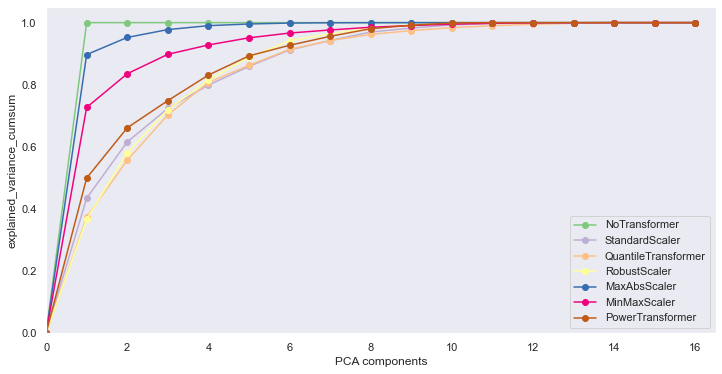

In [28]:
pca_plot_cumsum(instance_pca_dict)

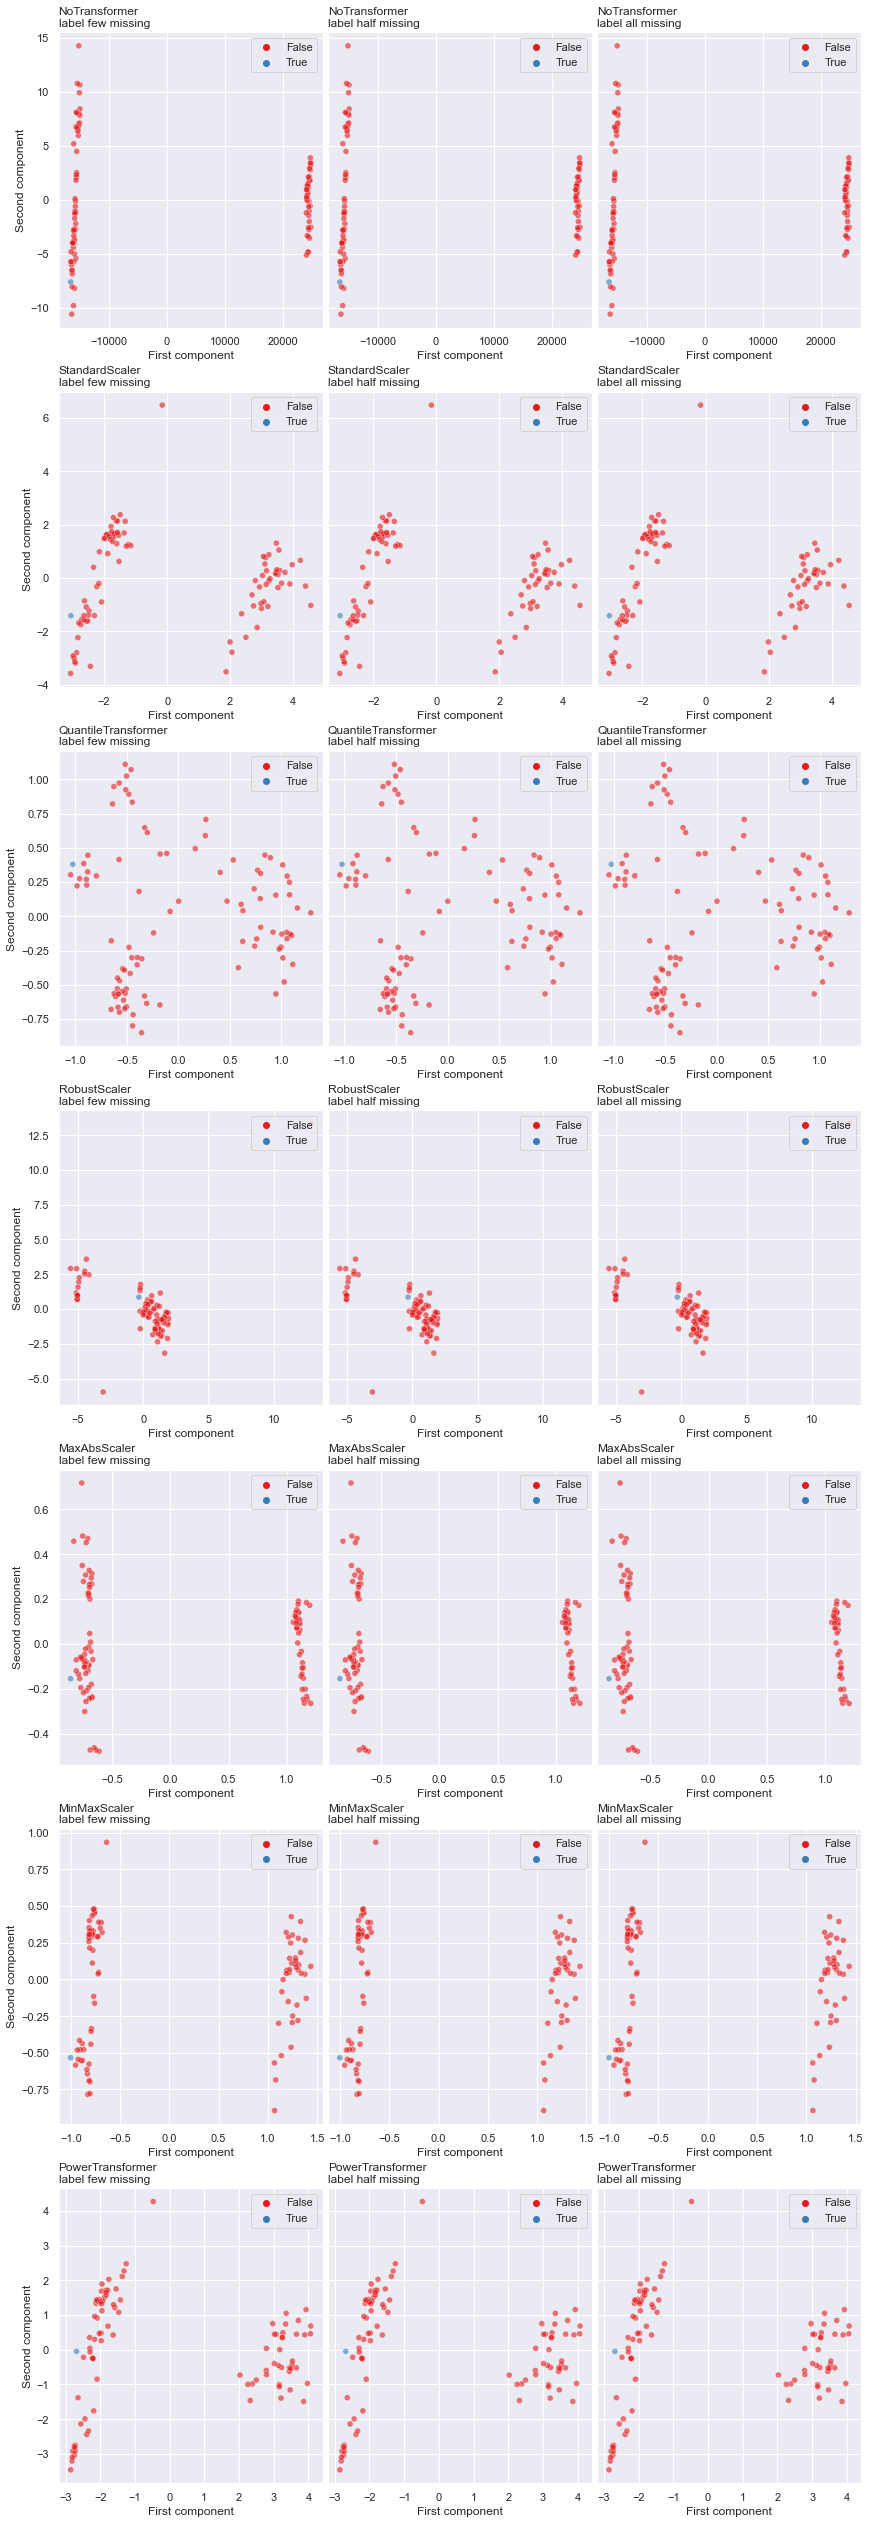

In [29]:
pca_scatter_plot(X_pca_dict, y_train)

In [30]:
# Since the different features are measurements of different types, standardize the values between 0 and 1
scaler = preprocessing.MinMaxScaler()

# StandardScaler()
# QuantileTransformer()
# RobustScaler()
# Normalizer()
#              MaxAbsScaler() 
# MinMaxScaler()
# PowerTransformer()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train_imputed), columns=X_train_imputed.columns, index=X_train_imputed.index
)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(
    scaler.transform(X_test_imputed), columns=X_test_imputed.columns, index=X_test_imputed.index
)

In [31]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Reactor Press (mbar),97.0,0.608935,0.245634,0.0,0.333333,0.666667,0.666667,1.0
TGV Position (%),97.0,0.703309,0.240485,0.0,0.604651,0.709302,0.918605,1.0
dP Filter (mbar),97.0,0.397962,0.327456,0.0,0.008751,0.535908,0.666325,1.0
DOR Press (mbar),97.0,0.716070,0.154858,0.0,0.705882,0.705882,0.823529,1.0
RF_Power (%),97.0,0.773540,0.121492,0.0,0.728070,0.745614,0.780702,1.0
Ceiling N2/H2 Ratio,97.0,0.387033,0.098102,0.0,0.342005,0.365970,0.397449,1.0
Y-Tube Delta_Temp (°C),97.0,0.630984,0.206848,0.0,0.562500,0.656250,0.722656,1.0
Water In (°C),97.0,0.557113,0.255098,0.0,0.400000,0.400000,0.800000,1.0
Water Center (°C),97.0,0.410309,0.239568,0.0,0.250000,0.250000,0.500000,1.0
Water Coil (°C),97.0,0.568755,0.159858,0.0,0.461538,0.538462,0.692308,1.0


In [32]:
# perform principle component analysis to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=5, svd_solver= 'full') # 5 with MaxAbsScalar()
X_train_PCA = pca.fit_transform(X_train_imputed)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train_imputed.index

X_test_PCA = pca.transform(X_test_imputed)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test_imputed.index